This project will try to investigate any coreeelations betrween time in education, including gender based differences, and level of development of countries and regions. I believe there should be clear correlation between these two factors with the most developed countries having the longest period in education and the smallest gender based difference. This still leaves the question about quality of education and causation of this.

It would be intersting to see the percentage of life spent in education by region and level of development, which would require comparison with life expectancy for each of them. 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/mara-ber/programing_for_data/main/data%20sets/Expected%20years%20of%20schooling%20(years).csv"
years_of_schooling = pd.read_csv(url)
years_of_schooling.info()
display(years_of_schooling)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      210 non-null    object
 1   1990         208 non-null    object
 2   1991         210 non-null    object
 3   1992         210 non-null    object
 4   1993         210 non-null    object
 5   1994         210 non-null    object
 6   1995         210 non-null    object
 7   1996         210 non-null    object
 8   1997         210 non-null    object
 9   1998         210 non-null    object
 10  1999         210 non-null    object
 11  2000         210 non-null    object
 12  2001         210 non-null    object
 13  2002         210 non-null    object
 14  2003         210 non-null    object
 15  2004         210 non-null    object
 16  2005         210 non-null    object
 17  2006         210 non-null    object
 18  2007         210 non-null    object
 19  2008         210 non-null    

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 31
0,Afghanistan,2.6,2.9,3.2,3.6,3.9,4.2,4.6,4.9,5.2,...,9.5,10,10.2,10.3,10.2,10.3,10.1,10.1,10.2,a
1,Albania,11.6,11.8,10.7,10.1,10.1,10.2,10.2,10.5,10.7,...,13.7,14.6,14.9,15.3,15.1,14.8,14.8,14.7,14.7,a
2,Algeria,9.6,9.7,9.8,9.8,9.9,9.8,10,10.3,10.5,...,14.3,13.9,13.6,14,14.2,14.2,14.4,14.5,14.6,a
3,Andorra,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,...,11.7,13.5,13.1,13.5,13.1,13.3,13,13.3,13.3,"a,b"
4,Angola,3.4,3.3,3.2,3.7,3.8,3.9,4,4.1,4.2,...,9.5,9.9,10.3,10.7,11,11.4,11.8,11.8,11.8,"a,c"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Sub-Saharan Africa,6.3,6.3,6.3,6.4,6.4,6.6,6.7,6.8,7,...,9.4,9.5,9.8,9.8,9.9,9.9,10,10,10.1,NaN
206,Least Developed Countries,5.2,5.3,5.4,5.5,5.6,5.7,5.9,6.1,6.3,...,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.8,9.9,NaN
207,Small Island Developing States,9.7,9.7,9.7,9.8,9.7,9.7,9.9,9.9,10,...,12.2,11.9,11.9,12,12.2,12.1,12.2,12.2,12.3,NaN
208,Organization for Economic Co-operation and Dev...,13.3,13.5,13,13.8,14,14.2,14.3,13.9,14.5,...,15.6,15.7,16,16,16.1,16.3,16.3,16.3,16.3,NaN


clean the data frame; unnamed column contains only 193 values out of 210, and in fact doesn't contain valuable information for this analysis.

In [13]:
years_of_schooling.drop(years_of_schooling.columns[31], axis = 1, inplace = True)
years_of_schooling.info()
display(years_of_schooling)
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  210 non-null    object
 1   1990     208 non-null    object
 2   1991     210 non-null    object
 3   1992     210 non-null    object
 4   1993     210 non-null    object
 5   1994     210 non-null    object
 6   1995     210 non-null    object
 7   1996     210 non-null    object
 8   1997     210 non-null    object
 9   1998     210 non-null    object
 10  1999     210 non-null    object
 11  2000     210 non-null    object
 12  2001     210 non-null    object
 13  2002     210 non-null    object
 14  2003     210 non-null    object
 15  2004     210 non-null    object
 16  2005     210 non-null    object
 17  2006     210 non-null    object
 18  2007     210 non-null    object
 19  2008     210 non-null    object
 20  2009     210 non-null    object
 21  2010     210 non-null    object
 22  20

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,2.6,2.9,3.2,3.6,3.9,4.2,4.6,4.9,5.2,...,9.5,9.5,10,10.2,10.3,10.2,10.3,10.1,10.1,10.2
1,Albania,11.6,11.8,10.7,10.1,10.1,10.2,10.2,10.5,10.7,...,13,13.7,14.6,14.9,15.3,15.1,14.8,14.8,14.7,14.7
2,Algeria,9.6,9.7,9.8,9.8,9.9,9.8,10,10.3,10.5,...,14,14.3,13.9,13.6,14,14.2,14.2,14.4,14.5,14.6
3,Andorra,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,...,11.7,11.7,13.5,13.1,13.5,13.1,13.3,13,13.3,13.3
4,Angola,3.4,3.3,3.2,3.7,3.8,3.9,4,4.1,4.2,...,8.6,9.5,9.9,10.3,10.7,11,11.4,11.8,11.8,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Sub-Saharan Africa,6.3,6.3,6.3,6.4,6.4,6.6,6.7,6.8,7,...,9.1,9.4,9.5,9.8,9.8,9.9,9.9,10,10,10.1
206,Least Developed Countries,5.2,5.3,5.4,5.5,5.6,5.7,5.9,6.1,6.3,...,9,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.8,9.9
207,Small Island Developing States,9.7,9.7,9.7,9.8,9.7,9.7,9.9,9.9,10,...,12.1,12.2,11.9,11.9,12,12.2,12.1,12.2,12.2,12.3
208,Organization for Economic Co-operation and Dev...,13.3,13.5,13,13.8,14,14.2,14.3,13.9,14.5,...,15.5,15.6,15.7,16,16,16.1,16.3,16.3,16.3,16.3


Seems the end of the table contains some summary of information by different categories, to take a closer look at this I will display the last 20 rows

In [15]:
years_of_schooling.tail(20)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
190,Yemen,7.5,7.5,7.6,7.6,7.6,7.6,7.6,7.6,7.6,...,8.6,9,8.5,8.8,8.7,8.7,8.7,8.7,8.7,8.8
191,Zambia,7.5,7.7,8,8.2,8.4,8.7,8.9,9.1,9.3,...,11,10.9,10.9,11,11,11.1,11.2,11.3,11.4,11.5
192,Zimbabwe,9.8,10.2,9.8,9.8,9.8,9.8,9.8,9.8,9.8,...,10.1,10.2,10.3,10.2,10.3,10.3,10.4,10.5,10.5,11
193,Human Development,NaN,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
194,Very high human development,13.3,13.4,13,13.7,13.8,13.9,14,13.7,14.2,...,15.6,15.7,15.8,16.1,16.2,16.3,16.4,16.4,16.4,16.3
195,High human development,9.7,9.7,9.8,9.9,9.9,10.1,10.3,10.4,10.5,...,12.9,13.1,13.3,13.5,13.6,13.7,13.8,13.8,13.8,14
196,Medium human development,7.3,7.4,7.5,7.6,7.7,7.8,7.9,7.9,8,...,10.3,10.7,10.9,11,11.2,11.3,11.6,11.7,11.7,11.5
197,Low human development,5.4,5.4,5.4,5.5,5.5,5.7,5.9,6.1,6.3,...,8.7,8.9,9,9.2,9.2,9.3,9.2,9.3,9.3,9.4
198,Developing Countries,8.4,8.5,8.5,8.6,8.6,8.8,8.9,9,9.1,...,11.3,11.5,11.7,11.8,12,12,12.2,12.2,12.2,12.2
199,Regions,NaN,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


First of all, I'd like to analyse data by level of human development, so I will create a separate table wich will contain only this information.

In [33]:
schooling_development = years_of_schooling[194:199]
schooling_development.reset_index(drop=True, inplace=True)
display(schooling_development)


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Very high human development,13.3,13.4,13,13.7,13.8,13.9,14,13.7,14.2,...,15.6,15.7,15.8,16.1,16.2,16.3,16.4,16.4,16.4,16.3
1,High human development,9.7,9.7,9.8,9.9,9.9,10.1,10.3,10.4,10.5,...,12.9,13.1,13.3,13.5,13.6,13.7,13.8,13.8,13.8,14
2,Medium human development,7.3,7.4,7.5,7.6,7.7,7.8,7.9,7.9,8,...,10.3,10.7,10.9,11,11.2,11.3,11.6,11.7,11.7,11.5
3,Low human development,5.4,5.4,5.4,5.5,5.5,5.7,5.9,6.1,6.3,...,8.7,8.9,9,9.2,9.2,9.3,9.2,9.3,9.3,9.4
4,Developing Countries,8.4,8.5,8.5,8.6,8.6,8.8,8.9,9,9.1,...,11.3,11.5,11.7,11.8,12,12,12.2,12.2,12.2,12.2


There are a few rows that should be in this table, so I'm goiing to split them up and join to the table created above.

In [35]:
schooling_development_2 = years_of_schooling[206:209]
schooling_development_2.reset_index(drop=True, inplace=True)
display(schooling_development_2)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Least Developed Countries,5.2,5.3,5.4,5.5,5.6,5.7,5.9,6.1,6.3,...,9,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.8,9.9
1,Small Island Developing States,9.7,9.7,9.7,9.8,9.7,9.7,9.9,9.9,10,...,12.1,12.2,11.9,11.9,12,12.2,12.1,12.2,12.2,12.3
2,Organization for Economic Co-operation and Dev...,13.3,13.5,13,13.8,14,14.2,14.3,13.9,14.5,...,15.5,15.6,15.7,16,16,16.1,16.3,16.3,16.3,16.3


In [39]:
schooling_dev = pd.concat([schooling_development, schooling_development_2])
schooling_dev.reset_index(drop=True, inplace=True)
display(schooling_dev)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Very high human development,13.3,13.4,13,13.7,13.8,13.9,14,13.7,14.2,...,15.6,15.7,15.8,16.1,16.2,16.3,16.4,16.4,16.4,16.3
1,High human development,9.7,9.7,9.8,9.9,9.9,10.1,10.3,10.4,10.5,...,12.9,13.1,13.3,13.5,13.6,13.7,13.8,13.8,13.8,14
2,Medium human development,7.3,7.4,7.5,7.6,7.7,7.8,7.9,7.9,8,...,10.3,10.7,10.9,11,11.2,11.3,11.6,11.7,11.7,11.5
3,Low human development,5.4,5.4,5.4,5.5,5.5,5.7,5.9,6.1,6.3,...,8.7,8.9,9,9.2,9.2,9.3,9.2,9.3,9.3,9.4
4,Developing Countries,8.4,8.5,8.5,8.6,8.6,8.8,8.9,9,9.1,...,11.3,11.5,11.7,11.8,12,12,12.2,12.2,12.2,12.2
5,Least Developed Countries,5.2,5.3,5.4,5.5,5.6,5.7,5.9,6.1,6.3,...,9,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.8,9.9
6,Small Island Developing States,9.7,9.7,9.7,9.8,9.7,9.7,9.9,9.9,10,...,12.1,12.2,11.9,11.9,12,12.2,12.1,12.2,12.2,12.3
7,Organization for Economic Co-operation and Dev...,13.3,13.5,13,13.8,14,14.2,14.3,13.9,14.5,...,15.5,15.6,15.7,16,16,16.1,16.3,16.3,16.3,16.3


To work with data it should be converted to numeric type, which will allow to peform calculations on it, so I'm goint to write a function which will convert all data in the DF to numeric type, except for Country column.

In [40]:
schooling_dev_2 = pd.concat([pd.DataFrame([pd.to_numeric(schooling_dev[e],errors='coerce') \
                               for e in schooling_dev.columns if e not in ['Country']]).T,\
                 schooling_dev[['Country']]],axis=1)

schooling_dev_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1990     8 non-null      float64
 1   1991     8 non-null      float64
 2   1992     8 non-null      float64
 3   1993     8 non-null      float64
 4   1994     8 non-null      float64
 5   1995     8 non-null      float64
 6   1996     8 non-null      float64
 7   1997     8 non-null      float64
 8   1998     8 non-null      float64
 9   1999     8 non-null      float64
 10  2000     8 non-null      float64
 11  2001     8 non-null      float64
 12  2002     8 non-null      float64
 13  2003     8 non-null      float64
 14  2004     8 non-null      float64
 15  2005     8 non-null      float64
 16  2006     8 non-null      float64
 17  2007     8 non-null      float64
 18  2008     8 non-null      float64
 19  2009     8 non-null      float64
 20  2010     8 non-null      float64
 21  2011     8 non-null 

The convertion has been performed successfully and now values are numbers in the DF


I'd like to start with small illustration: the number of years for each level of development at the beggining of the given period and at the end.

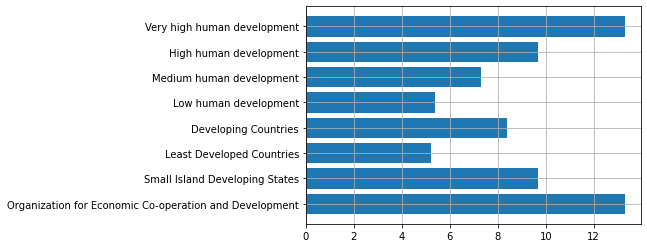

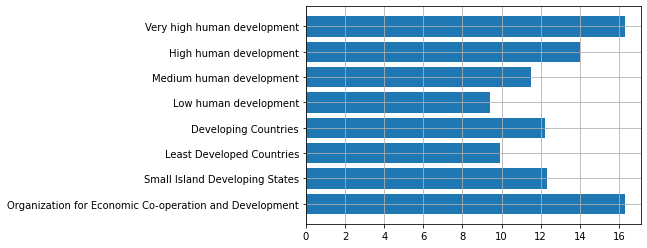

In [42]:
y_1990 = schooling_dev_2['1990'].values[::-1]
labels = ['Organization for Economic Co-operation and Development', 'Small Island Developing States', 'Least Developed Countries', 'Developing Countries', 'Low human development', 'Medium human development', 
          'High human development', 'Very high human development']
y_2019 = schooling_dev_2['2019'].values[::-1]

plt.barh(labels, y_1990)
plt.grid()
plt.show()
plt.barh(labels, y_2019)
plt.grid()
plt.show()

For purposes of analysis, I want to see summary of changes for each level of development. Firstly, how much time in education changed during the given period? In this case teh period will be 10 years, except for the last one, as the table contains data only up to 2019 so it will be 9 years. Also, how much it changed overall.

In [44]:
def change(df, x, y, name):
    n = df[y] - df[x]
    df[name] = n

change(schooling_dev_2, '1990', '2000', 'change 1990-2000')
change(schooling_dev_2, '2000', '2010', 'change 2000-2010')
change(schooling_dev_2, '2010', '2019', 'change 2010-2019')

def total(df, x, y, z):
    s = x + y + z
    df['total'] = s

total(schooling_dev_2, schooling_dev_2['change 1990-2000'], 
      schooling_dev_2['change 2000-2010'], 
      schooling_dev_2['change 2010-2019'])
display(schooling_dev_2)
    

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,Country,change 1990-2000,change 2000-2010,change 2010-2019,total
0,13.3,13.4,13.0,13.7,13.8,13.9,14.0,13.7,14.2,14.4,...,16.3,16.4,16.4,16.4,16.3,Very high human development,1.1,1.2,0.7,3.0
1,9.7,9.7,9.8,9.9,9.9,10.1,10.3,10.4,10.5,10.7,...,13.7,13.8,13.8,13.8,14.0,High human development,1.1,2.1,1.1,4.3
2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,7.9,8.0,8.1,...,11.3,11.6,11.7,11.7,11.5,Medium human development,0.8,2.2,1.2,4.2
3,5.4,5.4,5.4,5.5,5.5,5.7,5.9,6.1,6.3,6.5,...,9.3,9.2,9.3,9.3,9.4,Low human development,1.4,1.9,0.7,4.0
4,8.4,8.5,8.5,8.6,8.6,8.8,8.9,9.0,9.1,9.2,...,12.0,12.2,12.2,12.2,12.2,Developing Countries,0.9,2.0,0.9,3.8
5,5.2,5.3,5.4,5.5,5.6,5.7,5.9,6.1,6.3,6.6,...,9.6,9.7,9.8,9.8,9.9,Least Developed Countries,1.6,2.2,0.9,4.7
6,9.7,9.7,9.7,9.8,9.7,9.7,9.9,9.9,10.0,10.2,...,12.2,12.1,12.2,12.2,12.3,Small Island Developing States,0.5,1.9,0.2,2.6
7,13.3,13.5,13.0,13.8,14.0,14.2,14.3,13.9,14.5,14.6,...,16.1,16.3,16.3,16.3,16.3,Organization for Economic Co-operation and Dev...,1.2,1.0,0.8,3.0


This shows that the most rapid increace in number of years in education was diring 2000-2010, after this period this process slowed down for all levels of development. It would be intersting to compare it with changes by regions and by gender of students. 
Overall, the goup of countries with very high human development demonstrated the lowest increase in number of years in education during the period from 1990 to 2019. Other groups showed quite similar results in total change, from 4 to 4.3 years of increase. However, comparison of actuall numbers for 2019 shows that in these countries a person in average spend 5.9 years more in education than in countries with low level of human development (16.3 and 9.4).

Graphs for each level of development to see how the changes have been happenning

It could be easier to read the data if  the directions od the data would be the opposite: rows become columns and vice versa. 

In [45]:
schooling_development_t = schooling_dev_2.T
display(schooling_development_t)


,0,1,2,3,4,5,6,7
1990,13.3,9.7,7.3,5.4,8.4,5.2,9.7,13.3
1991,13.4,9.7,7.4,5.4,8.5,5.3,9.7,13.5
1992,13.0,9.8,7.5,5.4,8.5,5.4,9.7,13.0
1993,13.7,9.9,7.6,5.5,8.6,5.5,9.8,13.8
1994,13.8,9.9,7.7,5.5,8.6,5.6,9.7,14.0
1995,13.9,10.1,7.8,5.7,8.8,5.7,9.7,14.2
1996,14.0,10.3,7.9,5.9,8.9,5.9,9.9,14.3
1997,13.7,10.4,7.9,6.1,9.0,6.1,9.9,13.9
1998,14.2,10.5,8.0,6.3,9.1,6.3,10.0,14.5
1999,14.4,10.7,8.1,6.5,9.2,6.6,10.2,14.6


<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 1990 to total
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       35 non-null     object
 1   1       35 non-null     object
 2   2       35 non-null     object
 3   3       35 non-null     object
 4   4       35 non-null     object
 5   5       35 non-null     object
 6   6       35 non-null     object
 7   7       35 non-null     object
dtypes: object(8)
memory usage: 3.5+ KB


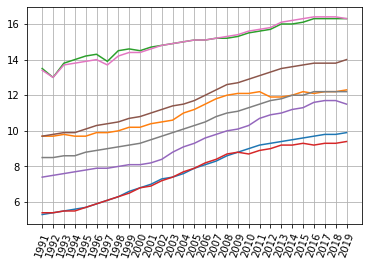

In [48]:

#display(schooling_development_t)
schooling_development_t.info()

VH_dev = schooling_development_t.iloc[1:30, 0]
labels = VH_dev.keys()
H_dev = schooling_development_t.iloc[1:30, 1]
M_dev = schooling_development_t.iloc[1:30, 2]
L_dev = schooling_development_t.iloc[1:30, 3]
D_dev = schooling_development_t.iloc[1:30, 4]
LD_dev = schooling_development_t.iloc[1:30, 5]
SI_dev = schooling_development_t.iloc[1:30, 6]
OECD_dev = schooling_development_t.iloc[1:30, 7]

plt.plot(labels, LD_dev)
plt.xticks(rotation=70)

plt.plot(labels, SI_dev)
plt.xticks(rotation=70)

plt.plot(labels, OECD_dev)
plt.xticks(rotation=70)

plt.plot(labels, L_dev)
plt.xticks(rotation=70)

plt.plot(labels, M_dev)
plt.xticks(rotation=70)

plt.plot(labels, H_dev)
plt.xticks(rotation=70)

plt.plot(labels, VH_dev)
plt.xticks(rotation=70)

plt.plot(labels, D_dev)
plt.xticks(rotation=70)
plt.grid()
plt.show()


The graphs show that for most of countries, except for "Medium human development" and "Developing countries", there is a slight decrease in time spent in education during the last few years.

Now let's see the change as a percentage, as in some sence it could be more illustrative than actual numbers. 


A function to calculate the percentage of change and save it as a new column in the data frame

In [49]:
def change_percent(df, x, y, name):
    n = df[y] / df[x] * 100
    df[name] = n.round(2)

change_percent(schooling_dev_2, '1990', 'total', 'change, %')

display(schooling_dev_2)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2016,2017,2018,2019,Country,change 1990-2000,change 2000-2010,change 2010-2019,total,"change, %"
0,13.3,13.4,13.0,13.7,13.8,13.9,14.0,13.7,14.2,14.4,...,16.4,16.4,16.4,16.3,Very high human development,1.1,1.2,0.7,3.0,22.56
1,9.7,9.7,9.8,9.9,9.9,10.1,10.3,10.4,10.5,10.7,...,13.8,13.8,13.8,14.0,High human development,1.1,2.1,1.1,4.3,44.33
2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,7.9,8.0,8.1,...,11.6,11.7,11.7,11.5,Medium human development,0.8,2.2,1.2,4.2,57.53
3,5.4,5.4,5.4,5.5,5.5,5.7,5.9,6.1,6.3,6.5,...,9.2,9.3,9.3,9.4,Low human development,1.4,1.9,0.7,4.0,74.07
4,8.4,8.5,8.5,8.6,8.6,8.8,8.9,9.0,9.1,9.2,...,12.2,12.2,12.2,12.2,Developing Countries,0.9,2.0,0.9,3.8,45.24
5,5.2,5.3,5.4,5.5,5.6,5.7,5.9,6.1,6.3,6.6,...,9.7,9.8,9.8,9.9,Least Developed Countries,1.6,2.2,0.9,4.7,90.38
6,9.7,9.7,9.7,9.8,9.7,9.7,9.9,9.9,10.0,10.2,...,12.1,12.2,12.2,12.3,Small Island Developing States,0.5,1.9,0.2,2.6,26.80
7,13.3,13.5,13.0,13.8,14.0,14.2,14.3,13.9,14.5,14.6,...,16.3,16.3,16.3,16.3,Organization for Economic Co-operation and Dev...,1.2,1.0,0.8,3.0,22.56


These calculations demonstrate that in fact the most dramatic improvement happened in countries with low human development; the increase in these countries was 74%, from 5.4 to 9.4 years in education, however it still well below numbers of countries with high and very high human development.

To illustrate this, let's use bar graph

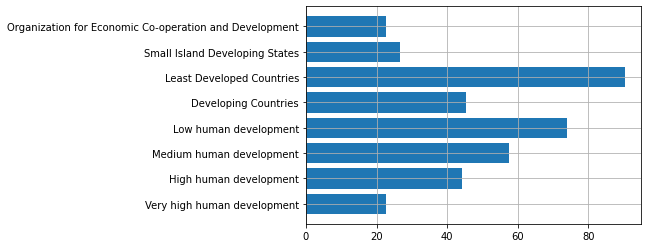

In [50]:
percentage = schooling_dev_2['change, %']
labels_2 = schooling_dev_2['Country']

plt.barh(labels_2, percentage)
plt.grid()
plt.show()

Also interesting, that even through the numbers for developing countries and countries with very high human development are different, the percentage of improvement is almost identical, which means that they are keeping the same "speed" of improvements in this area. 

Now let's take a look on changes by regions.